In [7]:
#pip install scipy

In [8]:
import numpy as np
import pandas as pd
import random 
from scipy.stats import gamma 
import matplotlib.pyplot as plt # do not use import matplotlib as plt
%matplotlib inline

In [9]:
#community structure graphon
def graphon(x,y):
    upper = [0.75,1.0] # upper bounds for community intervals, assumed to be an increasing list of positive reals terminating with one
    #print(upper)
    len_upper = len(upper)
    #print(len_upper)
    g_in = 0.8 # partnership probability for members of the same community
    g_out = 0.1 # partnership probability for members of different communities
    #lower = [0.;upper[1:end-1]] # corresponding lower bounds for community intervals
    lower = [0.0,upper[-1-1]] # corresponding lower bounds for community intervals
    #print(lower)
    for k in range(len_upper):
        if x >= lower[k] and x < upper[k] and y >= lower[k] and y < upper[k]:
           return g_in
    return g_out

In [10]:
# test
print(graphon(0.1,0.2))
print(graphon(0.1,0.1))
print(graphon(0.1,0.9))

0.8
0.8
0.1


Set up a new community structure graphon, no matter 2 agents are in the same community or different communities, the probability of trading is 0.8. 

In [11]:
# new community structure graphon
def graphon(x,y):
    upper = [0.75,1.0] # upper bounds for community intervals, assumed to be an increasing list of positive reals terminating with one
    #print(upper)
    len_upper = len(upper)
    #print(len_upper)
    g_in = 0.8 # partnership probability for members of the same community
    g_out = 0.1 # partnership probability for members of different communities
    #lower = [0.;upper[1:end-1]] # corresponding lower bounds for community intervals
    lower = [0.0,upper[-1-1]] # corresponding lower bounds for community intervals
    #print(lower)
    for k in range(len_upper):
        if x >= lower[k] and x < upper[k] and y >= lower[k] and y < upper[k]:
           return g_in
    return g_out

In [12]:
print(graphon(0.1,0.2))
print(graphon(0.1,0.1))
print(graphon(0.1,0.9))

0.8
0.8
0.1


## set up

In [13]:
# identifiers for agents (graph vertices)
agents =  np.arange(20)
#agents = agents[1:]
agents
#len(agents) hnn

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [14]:
import csv

In [15]:
#agents
x = agents
np.savetxt('agents.csv',x, delimiter= ',')

In [16]:
x = pd.read_csv('agents.csv')
x

,0.000000000000000000e+00
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0
5,6.0
6,7.0
7,8.0
8,9.0
9,10.0


In [17]:
len_agents = len(agents)
len_agents

20

In [18]:
#all tuples of agent indexes
pairs = []
for i in range(len_agents):
    for j in range(i+1,len_agents):
        pairs.append((i,j))
        
pairs

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 15),
 (2, 16),
 (2, 17),
 (2, 18),
 (2, 19),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (3, 10),
 (3, 11),
 (3, 12),
 (3, 13),
 (3, 14),
 (3, 15),
 (3, 16),
 (3, 17),
 (3, 18),
 (3, 19),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (4, 10),
 (4, 11),
 (4, 12),
 (4, 13),
 (4, 14),
 (4, 15),
 (4, 16),
 (4, 17),
 (4, 18),
 (4, 19),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (5, 10),
 (5, 11),
 (5, 12),
 (5, 13),
 (5, 14),
 (5, 15),
 (5, 16),
 (5, 17),
 (5, 18),
 (5, 19),
 (6, 7),
 (6, 8),
 (6, 9),
 (6, 10),
 (6, 11),
 (

In [19]:
len_pairs = len(pairs)
len_pairs

190

In [20]:
pairs[0] # the first one

(0, 1)

In [21]:
pairs[len_pairs-1] # the last one

(18, 19)

In [22]:
# "addresses of agents"
# generate 20 points from [0,1] 
location = []
n = 0.25
for i in range(10):
    location.append(n)
for i in range(10,20):
    location.append(0.75)

print(len(location))
location


20


[0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75]

In [23]:
len_location = len(location)
len_location

20

In [24]:
# trading partners (graph edges) as defined by the graphon
partnersQ = np.zeros(len_pairs)
k=0
for pair in pairs:
    #print(pair[0],pair[1])
    random_value = np.random.uniform(low=0.0, high=1.0) # uniform random variates in the interval [0,1)
    graphon_output = graphon(location[pair[0]],location[pair[1]])
    if graphon_output < random_value:
        partnersQ[k] = 1
        
    #print(location[pair[0]],location[pair[1]], random_value, graphon_output, partnersQ[k])
    k=k+1
partnersQ

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0.])

In [25]:
# trading partners (graph edges) as defined by the graphon
partnersQ = np.zeros(len_pairs)
k=0
for pair in pairs:
    #print(pair[0],pair[1])
    random_value = np.random.uniform(low=0.0, high=1.0) # uniform random variates in the interval [0,1)
    graphon_output = graphon(location[pair[0]],location[pair[1]])
    if graphon_output < random_value:
        partnersQ[k] = 1
        
    #print(location[pair[0]],location[pair[1]], random_value, graphon_output, partnersQ[k])
    k=k+1
partnersQ

array([1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 1.])

In [26]:
partnersQ1 = np.zeros(len_pairs)
partnersQ1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [27]:
len_partnersQ = len_pairs
len_partnersQ

190

We have 190 trading partners intotal. 

In [28]:
trading_pairs = []
for k in range(len_partnersQ):
    if partnersQ[k] > 0.0:
        trading_pairs.append(pairs[k])

trading_pairs

[(0, 1),
 (0, 2),
 (0, 5),
 (0, 8),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (2, 8),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 16),
 (2, 17),
 (2, 18),
 (2, 19),
 (3, 5),
 (3, 10),
 (3, 11),
 (3, 12),
 (3, 13),
 (3, 14),
 (3, 15),
 (3, 16),
 (3, 17),
 (3, 18),
 (3, 19),
 (4, 5),
 (4, 9),
 (4, 11),
 (4, 12),
 (4, 13),
 (4, 15),
 (4, 16),
 (4, 17),
 (4, 18),
 (4, 19),
 (5, 9),
 (5, 10),
 (5, 11),
 (5, 12),
 (5, 13),
 (5, 15),
 (5, 16),
 (5, 17),
 (5, 19),
 (6, 7),
 (6, 9),
 (6, 11),
 (6, 12),
 (6, 13),
 (6, 14),
 (6, 15),
 (6, 16),
 (6, 17),
 (7, 8),
 (7, 9),
 (7, 10),
 (7, 11),
 (7, 12),
 (7, 13),
 (7, 14),
 (7, 15),
 (7, 16),
 (7, 17),
 (7, 19),
 (8, 10),
 (8, 11),
 (8, 12),
 (8, 13),
 (8, 14),
 (8, 15),
 (8, 16),
 (8, 17),
 (9, 10),
 (9, 12),
 (9, 13),
 (9, 14),
 (9, 15),
 (9, 16),
 (9, 17),
 (9, 18),
 (9, 19),
 (10, 14),
 (1

In [29]:
len_trading_pairs = len(trading_pairs)
len_trading_pairs

108

In [30]:
first_data = []
for pair in trading_pairs:
    first_data.append(pair[0])

In [31]:
last_data = []
for pair in trading_pairs:
    last_data.append(pair[1])

In [32]:
# method-1
first_data = list(first_data) 
last_data = list(last_data)
all_data = first_data + last_data

# "number of trading partners for each agent"
partners_count = [sum([i == agent for i in all_data]) for agent in agents]
partners_count

[13, 11, 11, 11, 10, 12, 9, 12, 11, 14, 9, 9, 12, 10, 11, 10, 10, 11, 9, 11]

In [33]:
# method-2
partners_count = []
for agent in agents:
    count_times = 0
    for pair in trading_pairs:
        if pair[0] == agent or pair[1] == agent:
            count_times = count_times + 1
            
    partners_count.append(count_times)
 
partners_count  

[13, 11, 11, 11, 10, 12, 9, 12, 11, 14, 9, 9, 12, 10, 11, 10, 10, 11, 9, 11]

In [34]:
# "are there any isolated agents?"
defectiveQ = min(partners_count) == 0;
defectiveQ

False

We don't have any isolated agents. 

In [35]:
#adjacency = [[0]*len_agents]*len_agents
adjacency = [[0 for i in range(len_agents)] for j in range(len_agents)]
print(adjacency[0][2])
print(adjacency)

0
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0

In [36]:
for trading_pair in trading_pairs:
    row = trading_pair[0]
    col = trading_pair[1]
    adjacency[row][col] = 1
    adjacency[col][row] = 1

print(adjacency)

[[0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1], [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1], [1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1], [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1], [1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0], [0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0], [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0], [1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1], [1, 1, 

In [37]:
from numpy.linalg import eig

w,v=eig(adjacency)
print('E-value:', w)
#print('E-vector', v)
print(len(w))

E-value: [10.94276278 -6.90083004  2.74225787 -3.1135671   2.32304802 -2.69044985
 -2.23191096 -2.02165285  1.5746396   1.30027442 -1.48704522  0.82063753
  0.66061552  0.48443152  0.22564931 -0.9887904  -0.09689186 -0.19967217
 -0.60032188 -0.74318423]
20


In [38]:
# gamma_rv = sum(randn(2,length(location),4).^2,dims=3)
r_v = np.random.standard_normal((4, 2,len(location))) # 4 matrix with 2X20
r_v 

array([[[ 0.88110067,  0.35084217, -0.46116476,  0.83192907,
         -0.68709543, -0.7596943 , -0.70465312, -2.03701671,
         -0.1109915 ,  0.79790566, -0.60357146, -0.35134983,
         -0.25468599,  0.77527252, -0.08867938, -1.81748116,
         -0.95297014, -0.32785703,  0.75134821, -0.56620914],
        [-1.08225341, -0.34587404,  1.51669855,  0.09968527,
          1.5226851 ,  0.76873024, -0.88619563, -0.02532994,
          0.99387748,  1.66238717, -0.69474654,  1.3365572 ,
          0.58490959,  1.12407375, -1.55902039,  0.41732164,
         -0.17789895,  0.60357271, -1.91651286, -0.21304088]],

       [[ 0.26662525,  0.51419255, -0.17721681,  1.15213111,
          0.18584232, -0.44304295,  0.60838388, -0.6463122 ,
         -2.35889702, -2.08438892,  1.41865306,  0.15360759,
         -1.13071873, -1.65626697,  1.58119237,  0.06200624,
         -0.90324853, -0.25919221,  1.05772251,  0.77753181],
        [ 0.25460425, -0.2324302 , -0.48222119,  0.43232975,
          0.3562684

In [39]:
gamma_rv = np.sum(np.square(r_v), axis = 0)
gamma_rv # two arrays of random variates from Gamma(2,2)

array([[ 1.0224011 ,  5.01010991,  0.31565466,  4.08976953,  3.16452197,
         4.03893314,  1.62248694,  5.22580861,  6.09590523,  6.55324013,
         3.09150963,  5.3002112 ,  6.21894911,  6.46596295,  2.58036356,
         7.63723813,  3.24453466,  2.15059365,  2.04044229,  1.13632078],
       [ 1.43367063,  1.41243126,  4.47838993,  1.74944026,  6.03281363,
         4.44221959,  2.20106336,  8.09569237,  3.0170245 ,  3.62069308,
        10.12045576,  7.78636272,  2.01753575,  2.62374134,  4.74193845,
         4.21617357,  4.07727339,  1.74274506,  6.7969299 ,  2.93467208]])

In [40]:
# allocation of complementary commodities, with initial endownments
allocation_A = gamma_rv[0]/np.sum(gamma_rv[0])
allocation_B = gamma_rv[1]/np.sum(gamma_rv[1])

In [41]:
sum(np.minimum(allocation_A,allocation_B)) # aggregate utility

0.6699164071560053

In [42]:
trading_pair = random.choice(trading_pairs) #random.choice(trading_pairs) #random.sample(trading_pairs, 1)
trading_pair

(5, 13)

In [43]:
#"storage for simulation results"
buyer_A=[]
buyer_B=[]

quantity_A=[]
quantity_B=[]
agg_util=[]


### main loop

In [44]:
count = 0
N=0
for N in range(10000):
#for N in range(10):
    trading_pair = random.choice(trading_pairs) # randomly select a trading pair
    if allocation_A[trading_pair[0]] > allocation_B[trading_pair[0]] and allocation_A[trading_pair[1]] < allocation_B[trading_pair[1]]:
        Δ = 1
        l = np.minimum(allocation_A[trading_pair[0]]-allocation_B[trading_pair[0]],allocation_B[trading_pair[1]]-allocation_A[trading_pair[1]])
    elif allocation_A[trading_pair[0]] < allocation_B[trading_pair[0]] and allocation_A[trading_pair[1]] > allocation_B[trading_pair[1]]:
        Δ = -1
        l = np.maximum(allocation_A[trading_pair[0]]-allocation_B[trading_pair[0]],allocation_B[trading_pair[1]]-allocation_A[trading_pair[1]])
    else:
        Δ = 0
        
    #print("trading_pair=",trading_pair)
    #print("l=",l)
    #print("Δ=",Δ)
    
    if Δ != 0:
        u1,u2 = np.random.rand(2)
        if u1 + u2 > 1:
            u1 = 1 - u1
            u2 = 1 - u2
        
        ΔA = l*u1
        ΔB = l*u2
        allocation_A[trading_pair[0]] -= ΔA
        allocation_A[trading_pair[1]] += ΔA
        allocation_B[trading_pair[0]] += ΔB
        allocation_B[trading_pair[1]] -= ΔB
        
        if Δ > 0:
            buyer_A.append(trading_pair[1])
            buyer_B.append(trading_pair[0])
        else:
            buyer_A.append(trading_pair[0])
            buyer_B.append(trading_pair[1])
        
        quantity_A.append(Δ*ΔA)
        quantity_B.append(Δ*ΔB)
        agg_util.append(sum(np.minimum(allocation_A,allocation_B)))  # aggregate utility
        #df = df.append(buyer_A,buyer_B,quantity_A,quantity_B,agg_util)
        
        count += 1
        #print(N)

print("count =",count)
print("N =",N)

count = 373
N = 9999


In [45]:
d = {"buyer_A": buyer_A,"buyer_B": buyer_B,"quantity_A":quantity_A,"quantity_B": quantity_B,"agg_util": agg_util}
df = pd.DataFrame(data = d)
print(df)

     buyer_A  buyer_B    quantity_A    quantity_B  agg_util
0          7       12  1.495681e-02  6.828339e-03  0.691702
1         14        3  1.217957e-02  5.679818e-03  0.709561
2         18       12  1.491166e-02  1.468213e-02  0.739155
3          6        9  3.054771e-03  7.482093e-04  0.742958
4          0       15  1.450802e-03  9.746895e-04  0.745383
..       ...      ...           ...           ...       ...
368        0       15  2.184473e-16  1.741231e-15  0.959516
369        0       15  8.187745e-17  1.962228e-17  0.959516
370        0       15  1.243892e-18  4.361832e-18  0.959516
371        0       15  6.429138e-19  6.782989e-19  0.959516
372        0       15  6.254799e-18  1.358233e-18  0.959516

[373 rows x 5 columns]


In [46]:
# Get the size of the dataframe
df.shape

(373, 5)

### convergence study

In [47]:
df.tail(50) # show the last 20 rows

,buyer_A,buyer_B,quantity_A,quantity_B,agg_util
323,18,9,1.164320e-07,6.201981e-07,0.959515
324,4,15,2.219925e-13,6.506988e-15,0.959515
325,4,13,9.910388e-15,5.431414e-14,0.959515
326,4,13,8.869917e-16,1.561595e-16,0.959515
327,10,9,6.580854e-08,2.555726e-07,0.959516
328,4,15,1.081311e-15,1.164595e-15,0.959516
329,18,13,2.713089e-11,1.116066e-11,0.959516
330,4,15,2.687573e-15,8.000658e-16,0.959516
331,4,13,7.214170e-17,4.945419e-16,0.959516
332,4,15,3.473384e-17,1.367059e-16,0.959516


We can see for 10 agents of 190 trading pairs, the aggregate utility is converging to 0.959516. 

In [48]:
# [agents allocation_A allocation_B][abs.(allocation_A-allocation_B).>1e-4,:]
cnt = 0
for i in range(len_agents):
    if abs(allocation_A[i]-allocation_B[i]) > 1e-4:
        cnt += 1

arr6=[[0 for i in range(3)] for j in range(cnt)]

k = 0
for i in range(len_agents):
    if abs(allocation_A[i]-allocation_B[i]) > 1e-4:
        arr6[k][0] = agents[i]
        arr6[k][1] = allocation_A[i]
        arr6[k][2] = allocation_B[i]
        k += 1
        
arr6

[[2, 0.03611676624866937, 0.04196867478738057],
 [10, 0.05710825818742655, 0.08779145142852914],
 [11, 0.07757296566058682, 0.08062436006634179],
 [15, 0.09540892052726532, 0.054924917037233616],
 [18, 0.056835278180234594, 0.057732785484697645]]

In [49]:
# (adjacency^1)[abs.(allocation_A-allocation_B).>1e-4,abs.(allocation_A-allocation_B).>1e-4]

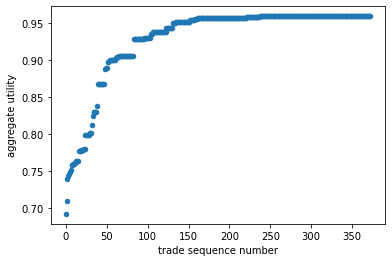

In [50]:
#df.plot(use_index=True, y='agg_util', kind = 'scatter')
df['index'] = df.index # find the index of df
#fig1 = plt.figure()
fig1 = df.plot(x = 'index', y='agg_util', kind = 'scatter', xlabel = 'trade sequence number', ylabel = 'aggregate utility')
plt.savefig("fig1.png") # plt.savefig() needs to be called right above the plt.show()
plt.show()

In [51]:
last_agg = list(df['agg_util'])[-1]
print('The last value of agg_util is',last_agg)

The last value of agg_util is 0.9595159965099683


In [52]:
num_last = list(df['agg_util']).count(last_agg)
print('The number of last vaule is', num_last)

The number of last vaule is 4


In [53]:
list(df['agg_util'])[170]

0.9574416561260345

In [54]:
# df2 = DataFrame(trade_count=Int64[],agg_util=Float64[]);
trade_count = []
agg_util = []

In [55]:
# gamma_rv = sum(randn(2,length(location),4).^2,dims=3)
def pz_gamma_rv(len_loc):
    r_v = np.random.standard_normal((4, 2,len_loc)) # 4 matrix with 2X20
    gamma_rv = np.sum(np.square(r_v), axis = 0)
    return gamma_rv

In [56]:
for N_runs in range(10000):
    gamma_rv = pz_gamma_rv(len_location)
    allocation_A = gamma_rv[0][:]/sum(gamma_rv[0][:])
    allocation_B = gamma_rv[1][:]/sum(gamma_rv[1][:])
    count = 0
    for N_trades in range(1000):
        trading_pair = random.choice(trading_pairs) # randomly select a trading pair
        if allocation_A[trading_pair[0]] > allocation_B[trading_pair[0]] and allocation_A[trading_pair[1]] < allocation_B[trading_pair[1]]:
            Δ = 1
            l = np.minimum(allocation_A[trading_pair[0]]-allocation_B[trading_pair[0]],allocation_B[trading_pair[1]]-allocation_A[trading_pair[1]])
        elif allocation_A[trading_pair[0]] < allocation_B[trading_pair[0]] and allocation_A[trading_pair[1]] > allocation_B[trading_pair[1]]:
            Δ = -1
            l = np.maximum(allocation_A[trading_pair[0]]-allocation_B[trading_pair[0]],allocation_B[trading_pair[1]]-allocation_A[trading_pair[1]])
        else:
            Δ = 0
        
        
        if Δ != 0:
            u1,u2 = np.random.rand(2)
            if u1 + u2 > 1:
                u1 = 1 - u1
                u2 = 1 - u2
        
            ΔA = l*u1
            ΔB = l*u2
            allocation_A[trading_pair[0]] -= ΔA
            allocation_A[trading_pair[1]] += ΔA
            allocation_B[trading_pair[0]] += ΔB
            allocation_B[trading_pair[1]] -= ΔB
            count += 1
       
    trade_count.append(count)
    agg_util.append(sum(np.minimum(allocation_A,allocation_B)))

print("count =",count)
print("N_runs =",N_runs)

count = 300
N_runs = 9999


In [57]:
d = {"trade_count": trade_count,"agg_util": agg_util}
df2 = pd.DataFrame(data = d)
print(df2)

      trade_count  agg_util
0             298  0.922790
1             309  0.971972
2             318  0.992913
3             303  0.979064
4             315  0.941034
...           ...       ...
9995          331  0.986477
9996          289  0.923283
9997          303  0.973808
9998          339  0.960823
9999          300  0.878949

[10000 rows x 2 columns]


In [58]:
last_agg = list(df2['agg_util'])[-1]
print('The last value of agg_util is',last_agg)

The last value of agg_util is 0.8789491849040696


In [59]:
type(df2['agg_util'])

pandas.core.series.Series

In [60]:
from statistics import mean

mean(df2['agg_util'])

0.9518714317263792

In [61]:
from statistics import stdev


stdev(df2['agg_util'])

0.0335737810235876

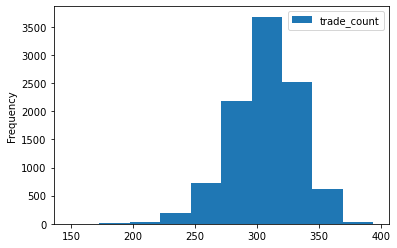

In [62]:
# df2['index'] = df2.index # find the index of df
fig2 = df2.plot(x = 'agg_util', kind = 'hist')
plt.savefig("fig2.png") # plt.savefig() needs to be called right above the plt.show()
plt.show()